# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## Establecer apariencia general de los gráficos

In [2]:
#Establece que los graficos se muestren luego de la celda de codigo que los ejecuto
%matplotlib inline
sns.set_style(style='whitegrid')
#Se elige el tipo de contexto como notebook
sns.set_context(context='notebook')
#Se define el tamaño por defecto del cuadro de os graficos
plt.rcParams['figure.figsize'] = (11, 9.4)
#Defnino un tipo de color  o paleta de color para las distintas especies de pinguinos
penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [4]:
path = ('./Datos/penguins.csv')
df = pd.read_csv(path)

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [4]:
#Muestra las columnas y el tipo de dato de las mismas
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [5]:
#Muestra el tipo de dato de las columnas y la cantidad que hay de cada una
#float64 equivale a variables numericas continuas
#object equivale a una variable nominal
#int64 equivale a variables numericas discretas
df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [6]:
#Muestra la cantidad de filas y columnas, lo que equivale a la cantidad de observaciones y variables respectivamente
df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [6]:
#Muestra toda la tabla (True indica que hay valores nulos, False indica que no hay valores nulos)
df.isnull()
#Muestra las columnas que contienen al menos un valor nulo
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [50]:
#Devuelve la suma de valores nulos por columna
nulos_columnas = pd.DataFrame()
nulos_columnas['columnas'] = (df.isnull().sum().copy()).index
nulos_columnas['nulos'] = (df.isnull().sum().copy()).values

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [10]:
#Devuelve la suma de la suma de los valores nulos por columna
total_nulos = df.isnull().sum().sum()

## ¿Cuál es la proporción de valores nulos por cada variable?

In [65]:
def porcentaje(value):
    #Se divide la cantidad de nulos de cada columna por el total de filas y se lo multiplica por 100
    value = value * 100 / df.shape[0]
    
    return value

In [66]:
#Se crea nueva columna que almacena el porcentaje de nulos por columna
nulos_columnas['porcentaje'] = nulos_columnas.nulos.apply(porcentaje)

<AxesSubplot: xlabel='columnas', ylabel='porcentaje'>

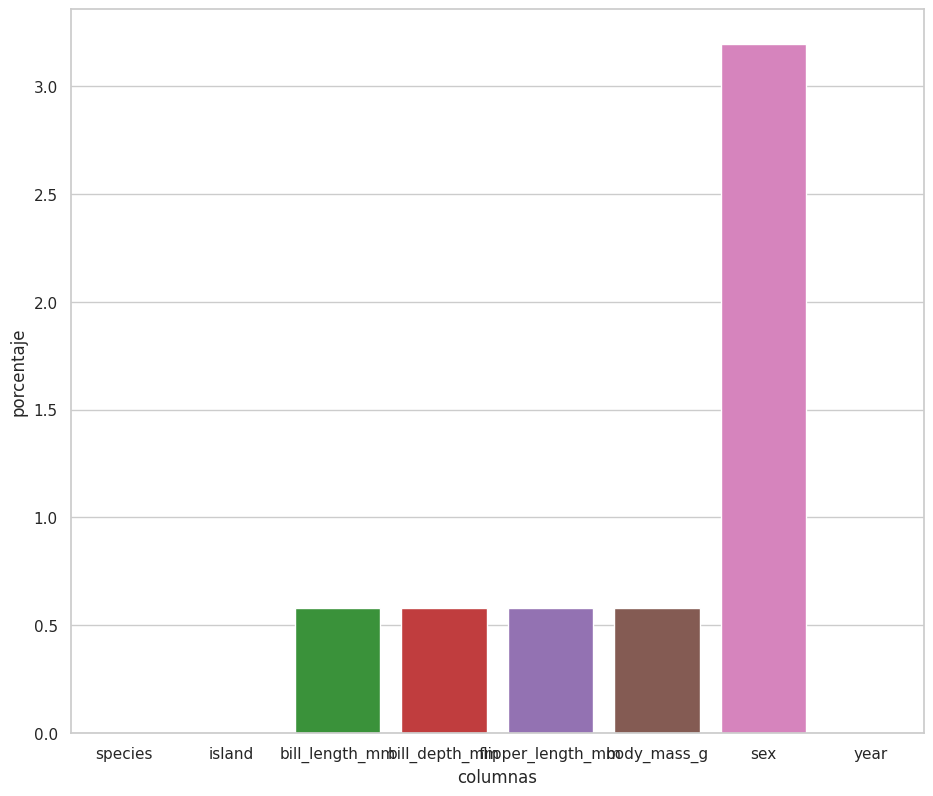

In [76]:
sns.barplot(
    data = nulos_columnas,
    x = nulos_columnas.columnas,
    y = nulos_columnas.porcentaje
    );

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

In [84]:
df.isnull().transpose()

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
species,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
island,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bill_depth_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
flipper_length_mm,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
body_mass_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sex,False,False,False,True,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

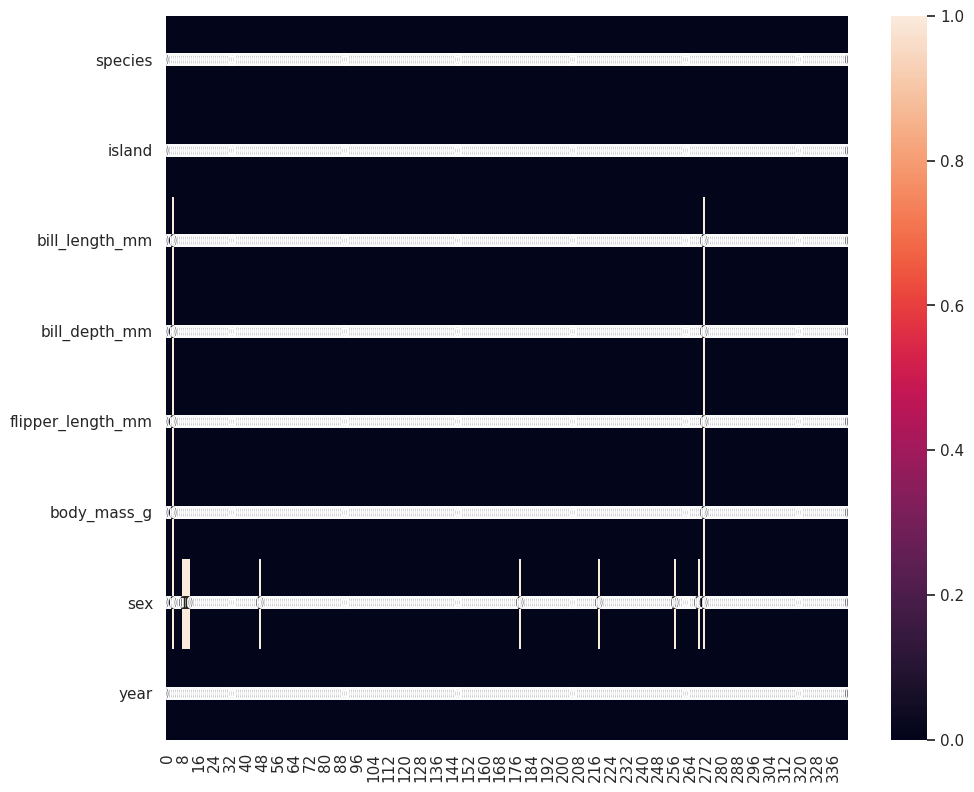

In [86]:
sns.heatmap(
    #Se utiliza transpose para visualizar mejor las etiquetas de las columnas, las cuales se mostraran sobre el eje "Y"
    data = df.isnull().transpose(),
    annot=True)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [94]:
#Se suma la cantidad de filas con nulos
df.isnull().any(axis=1).sum()

0

In [93]:
#Se eliminan filas con datos nulos 
df = df.dropna()

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [95]:
#Por defecto, se hace la estadistica solo sobre un tipo de variable, siendo esta la numerica
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo las numéricas

In [32]:
#Se espesifica que se haga la estadistica de las variables numericas
df.describe(include=[np.number]) 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [96]:
#Se hace estadistica de variables categoricas
#En este caso la cantidad de estadisticas sera menor, dado el tipo de variable
df.describe(include=[np.object]) 

/tmp/ipykernel_18470/1253661219.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [39]:
#Se cambia el tipo de dato de las variables, pasan de ser objeto a ser ategoricas
#Se toma la medida estadistica
(df.astype({
    'species':'category',
    'island':'category',
    'sex' : 'category'
}).describe(include = 'category')
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

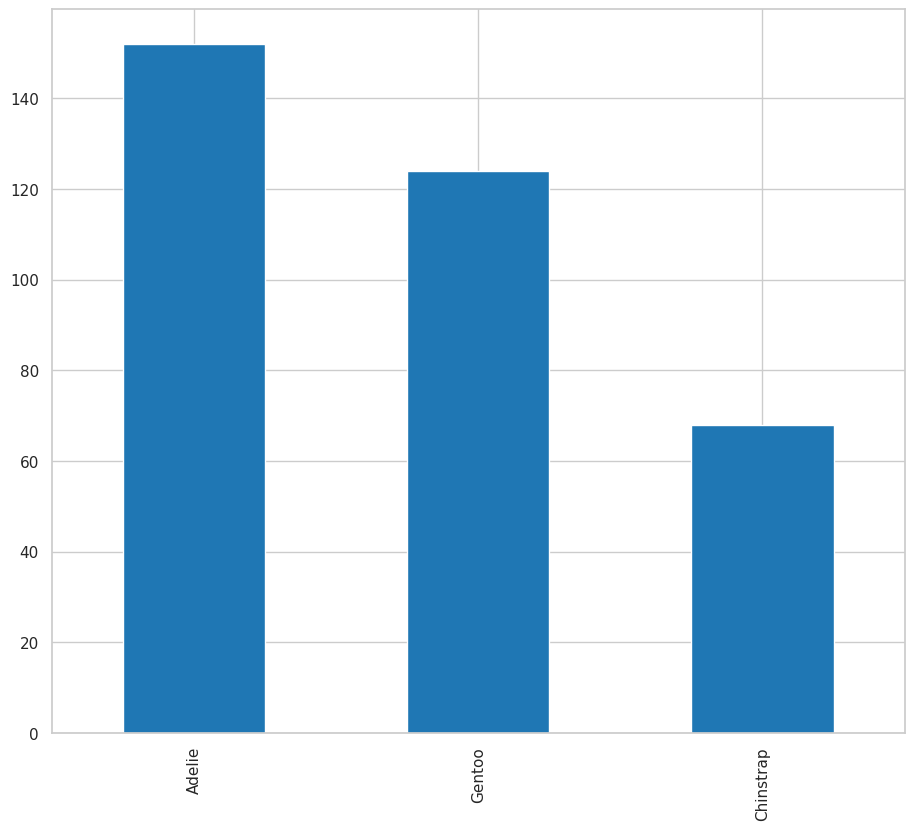

In [12]:
df.species.value_counts().plot(kind = 'bar')

### Seaborn

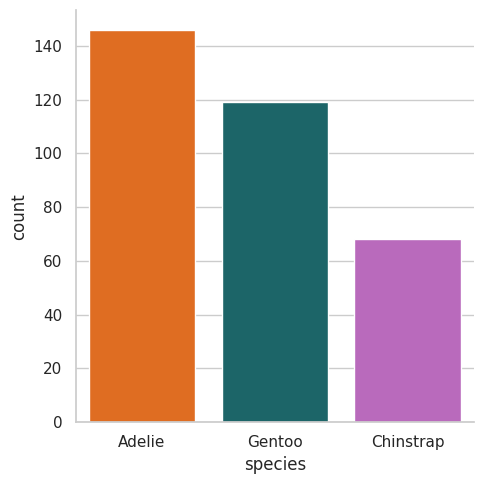

In [102]:
sns.catplot(
    data = df,
    x= 'species',
    #Se espesifica el tipo de operacion a realizar sobre las variables del eje x
    kind = 'count',
    #En este caso como el grafico se diferenciara por las especies, se puede utilizar la paleta de colores creada al comienzo
    palette= penguin_color
)

### ¿Cómo visualizar las proporciones?

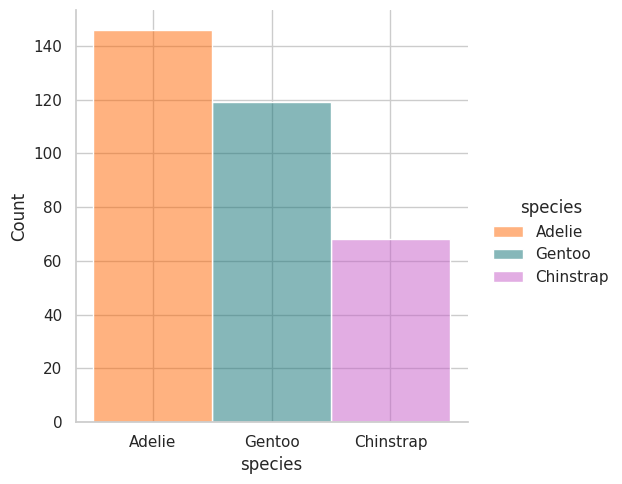

In [108]:
sns.displot(
    data = df,
    x = 'species',
    hue = 'species',
    palette=penguin_color
);

# Medidas de tendencia central

## Media o promedio

In [60]:
#Para todas y cada una de las columnas de la tabla, utilizando pandas
df.mean()

/tmp/ipykernel_8304/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [61]:
#Para todas y cada una de las columnas de la tabla, utilizando numpy
np.mean(df)

/home/cristian/Escritorio/CDIA/Proyectos/Procesamiento de datos/Curso-EDA-Live/pinguinos/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/cristian/Escritorio/CDIA/Proyectos/Procesamiento de datos/Curso-EDA-Live/pinguinos/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [62]:
#Por columna
df.bill_depth_mm.mean()

17.151169590643274

## Mediana

In [63]:
#Para todas y cada una de las columnas de la tabla, utilizando pandas
df.median()

/tmp/ipykernel_8304/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

## Moda

In [64]:
#Para todas y cada una de las columnas de la tabla, utilizando pandas
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [66]:
df.max()

/tmp/ipykernel_8304/1151452817.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
year                      2009
dtype: object

## ¿Cuál es el valor mínimo de las variables?

In [67]:
df.min()

/tmp/ipykernel_8304/3962516015.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                   2007
dtype: object

## ¿Cuál es el rango de las variables?

In [75]:
#Se seleccionan las variables numericas para evitar errores de operaciones entre elementos distintos
df.max(numeric_only=True) - df.min(numeric_only = True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [72]:
#Por defecto toma las variables numericas, para analizar las categoricas habria que hacer algun escalamiento
df.std()

/tmp/ipykernel_8304/3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [79]:
#Quartil 3
q3 = df.quantile(0.75)

/tmp/ipykernel_8304/852236489.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


In [80]:
#Quartil 1
q1 = df.quantile(0.25)

/tmp/ipykernel_8304/3169776471.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)


In [81]:
#Rango intercuartilico
rango_intercuartilico = q3 - q1

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

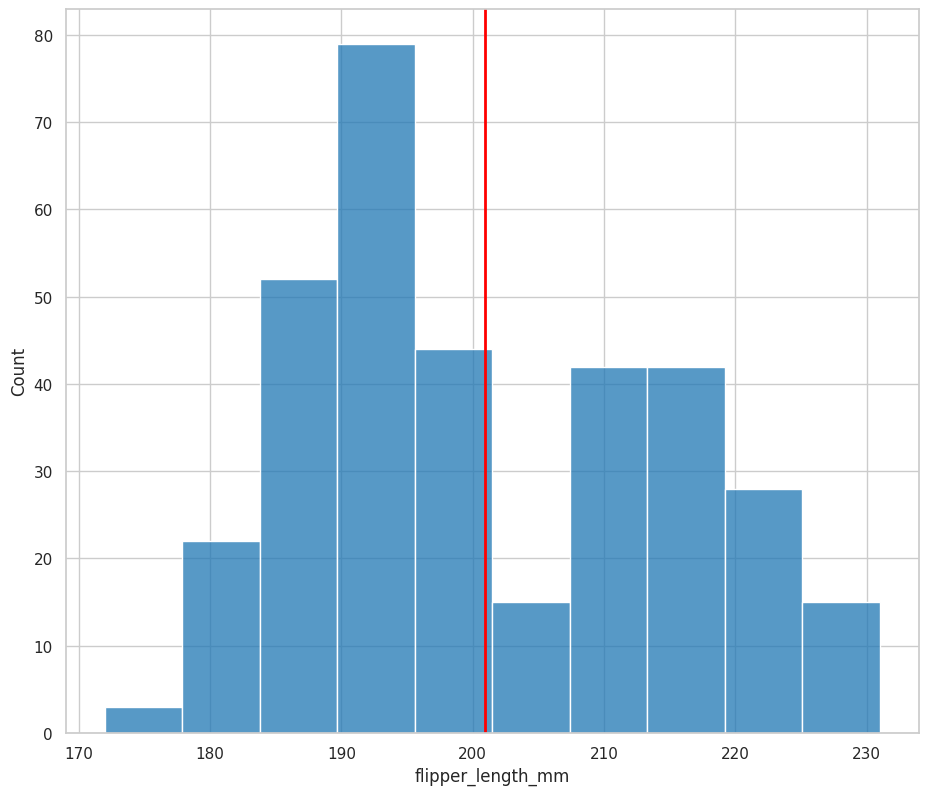

In [85]:
sns.histplot(
    data =  df,
    x = 'flipper_length_mm'
)
#linea para resaltar un dato de la columna ubicada sobre el eje x
plt.axvline(
    #medida donde se ubicara la linea
    x = df.flipper_length_mm.mean(),
    color = 'red',
    #Grosor de la linea
    linewidth = 2
)

### Diagrama de caja / boxplot

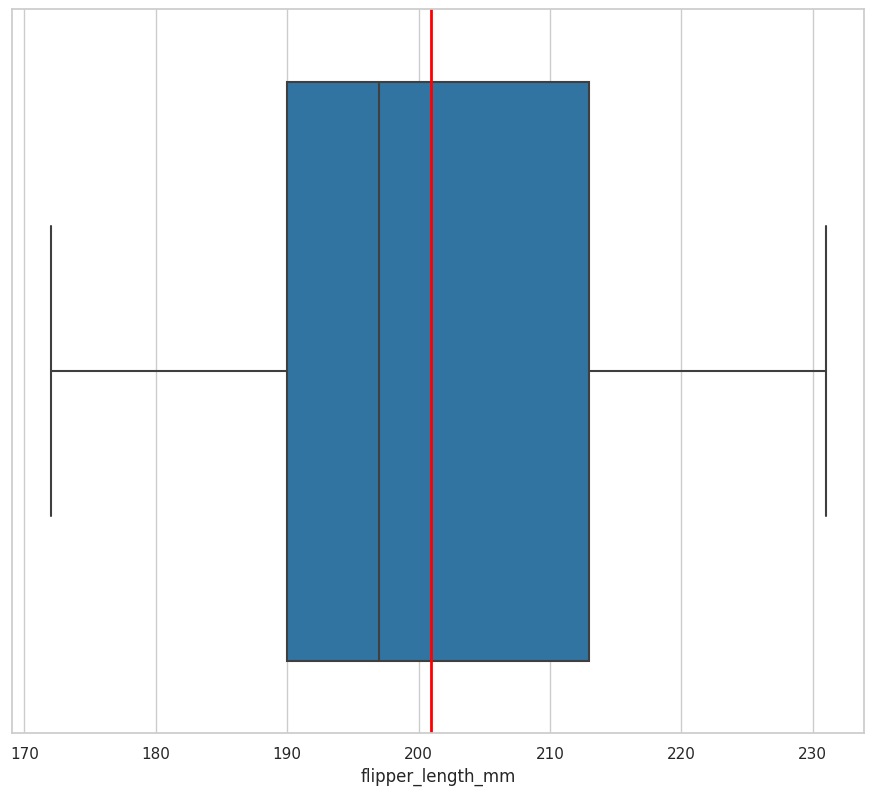

In [20]:
#Se utilizan las mismas herramientas que en el grafico anterior solo que se utiliza un diagrama de tipo bloxplot
sns.boxplot(data = df, x='flipper_length_mm')
plt.axvline(
    x = df.flipper_length_mm.mean(),
    color = 'red',
    linewidth = 2)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

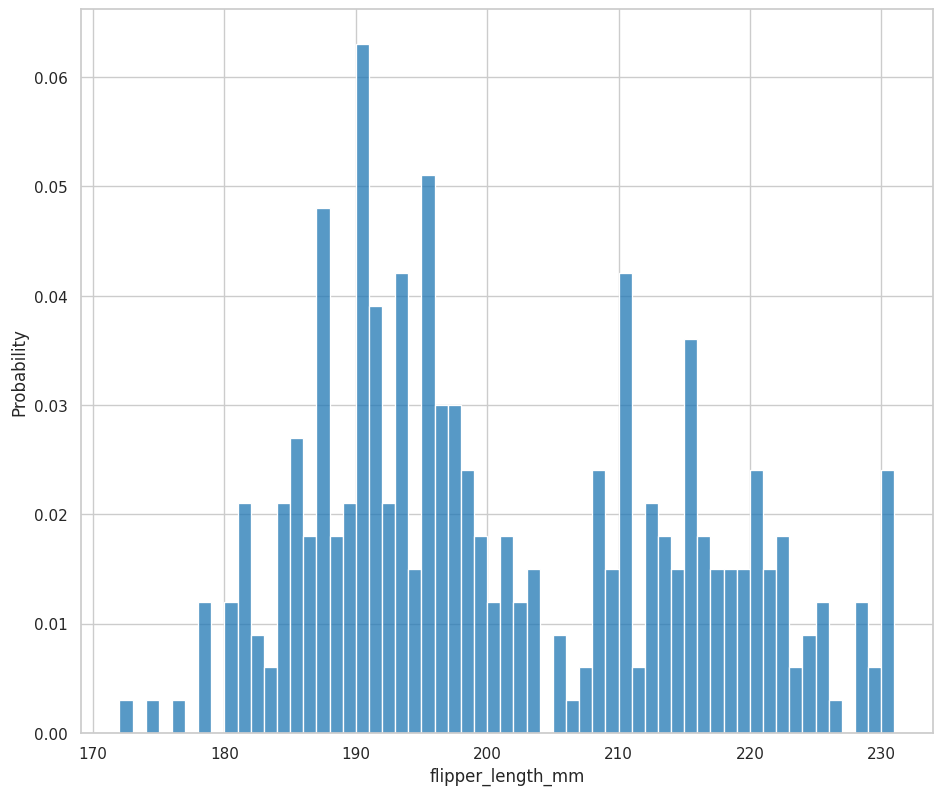

In [112]:
sns.histplot(
    data = df,
    x = 'flipper_length_mm',
    #Modifica el grosor de las barras
    binwidth = 1,
    #Funcion estadistica que se utilizara para valorar los valores de la columna
    stat = 'probability'
)

### Utilizando `empiricaldist`

In [113]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    df.flipper_length_mm,
    #Normaliza los datos de la columna
    normalize = True
)

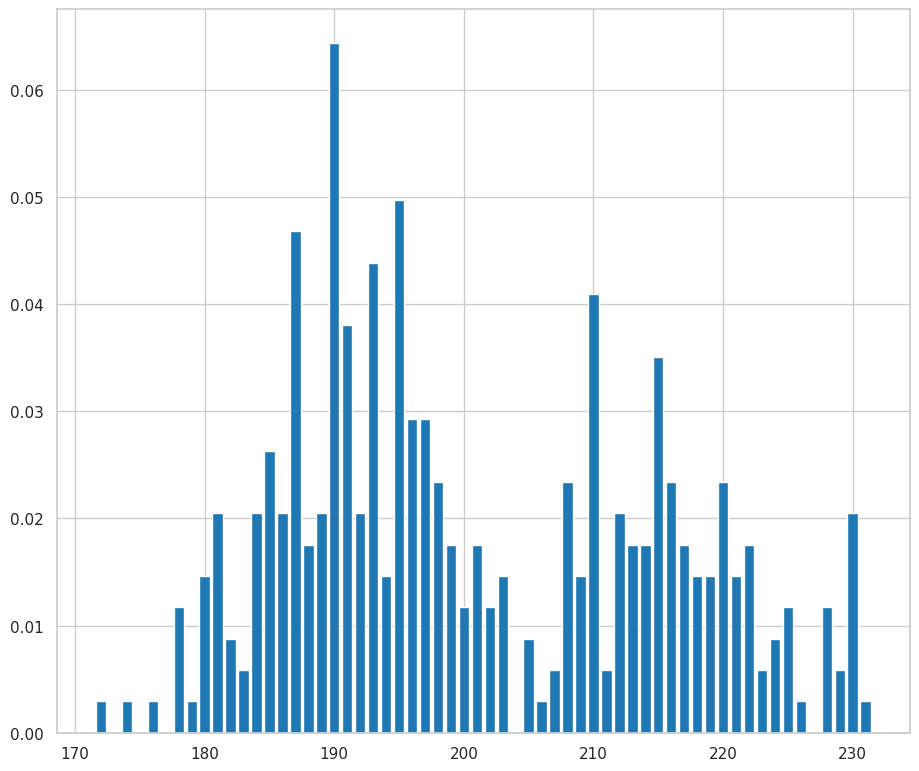

In [32]:
#Grafica las probabilidades obtenidas para los datos de la coumna, en un grafico de barras
pmf_flipper_length_mm.bar()

In [114]:
#Probabilidad de que exista un pinguino con esas caracteristicas
pmf_flipper_length_mm(180)

0.012012012012012012

In [115]:
#Probabilidad correspondiente al dato de la columna con mayor probabilidad
pmf_flipper_length_mm.max()

0.06306306306306306

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

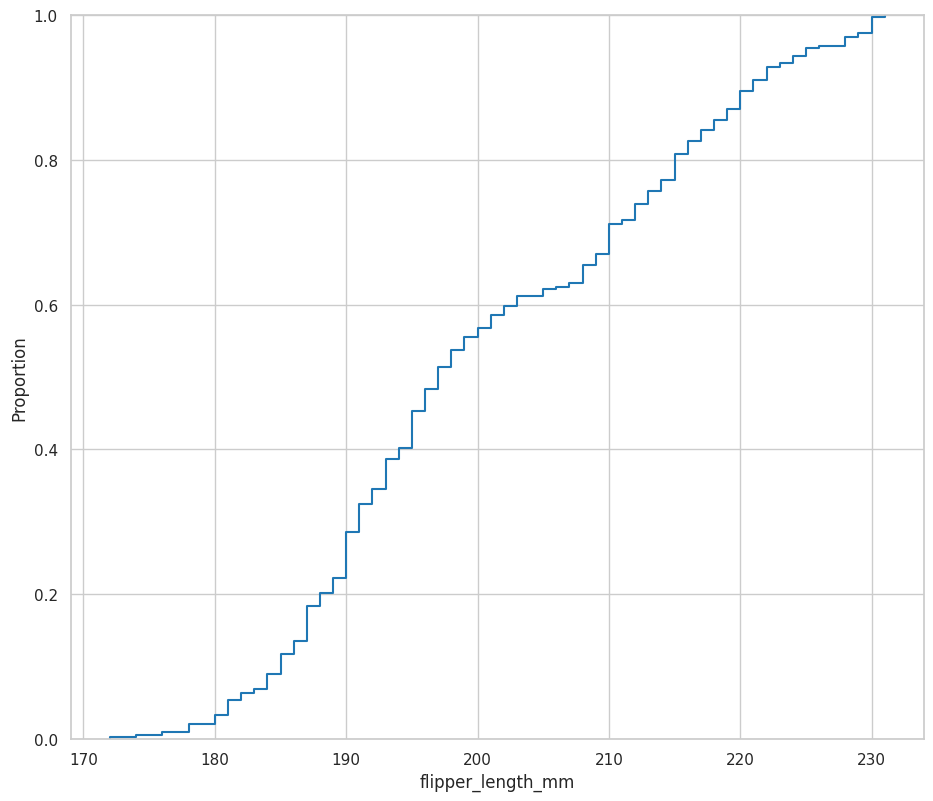

In [116]:
#Grafico especializado para ECDF
sns.ecdfplot(
    data = df,
    x = 'flipper_length_mm'
)

### Utilizando `empiricaldist`

In [117]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    df['flipper_length_mm'],
    #Normaliza los datos
    normalize = True
)

In [118]:
q = 290
p = cdf_flipper_length_mm.forward(q)

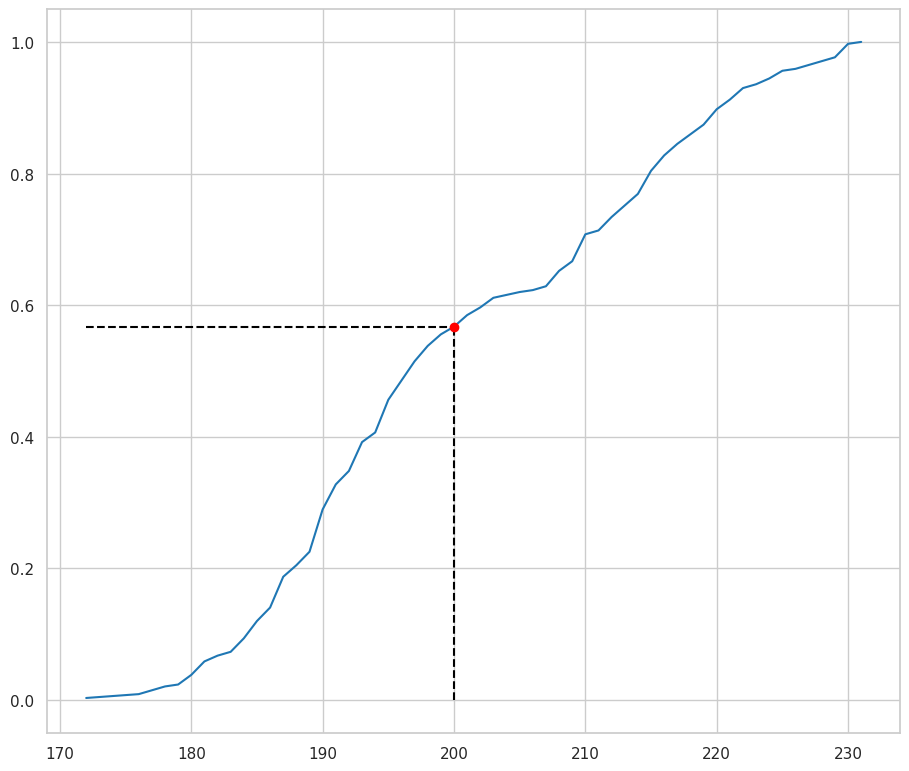

In [41]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

#lineas verticales
plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    #Color
    color='black',
    #Tipo de linea
    linestyle='dashed'
)

#Lineas horizontales
plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)


plt.plot(q,p, 'ro')

### Graficando valores dentro del rango intercuartilico

[]

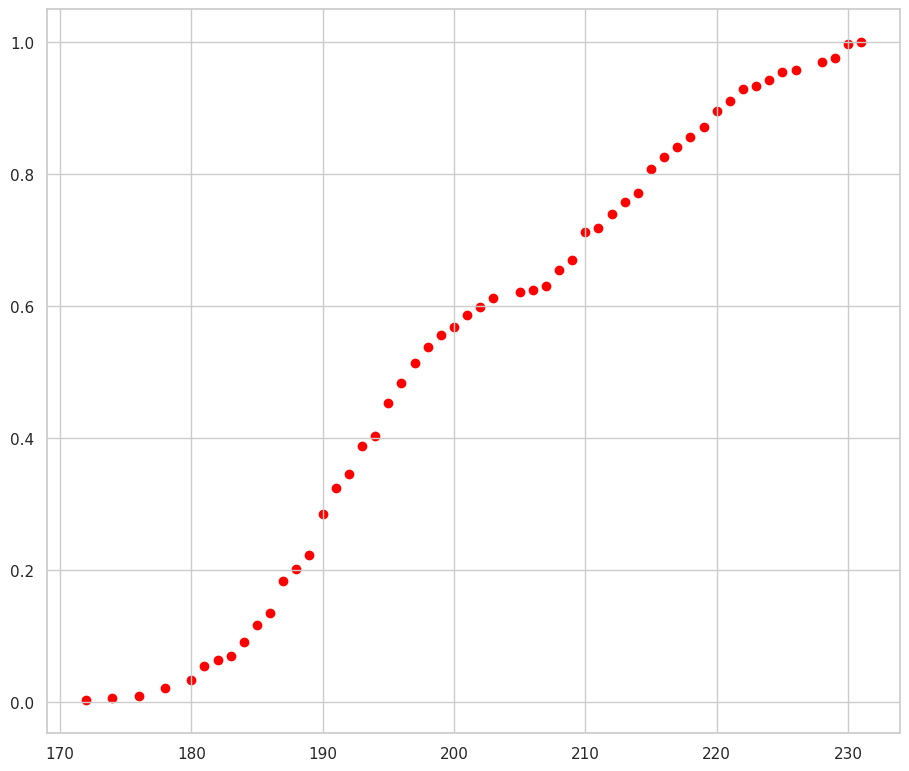

In [151]:
#Calculo cuartil 1 ycuartil 3
q1 = cdf_flipper_length_mm.quantile(0.25)
q3 = cdf_flipper_length_mm.quantile(0.75)

plt.scatter(
   x = cdf_flipper_length_mm.index,
   y = cdf_flipper_length_mm.values,
   color='red',
   zorder=0.5

)

#Se modifica los limites del eje x al rango intercuartilico
plt.plot(
   xlim = (q1, q3)
)


## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

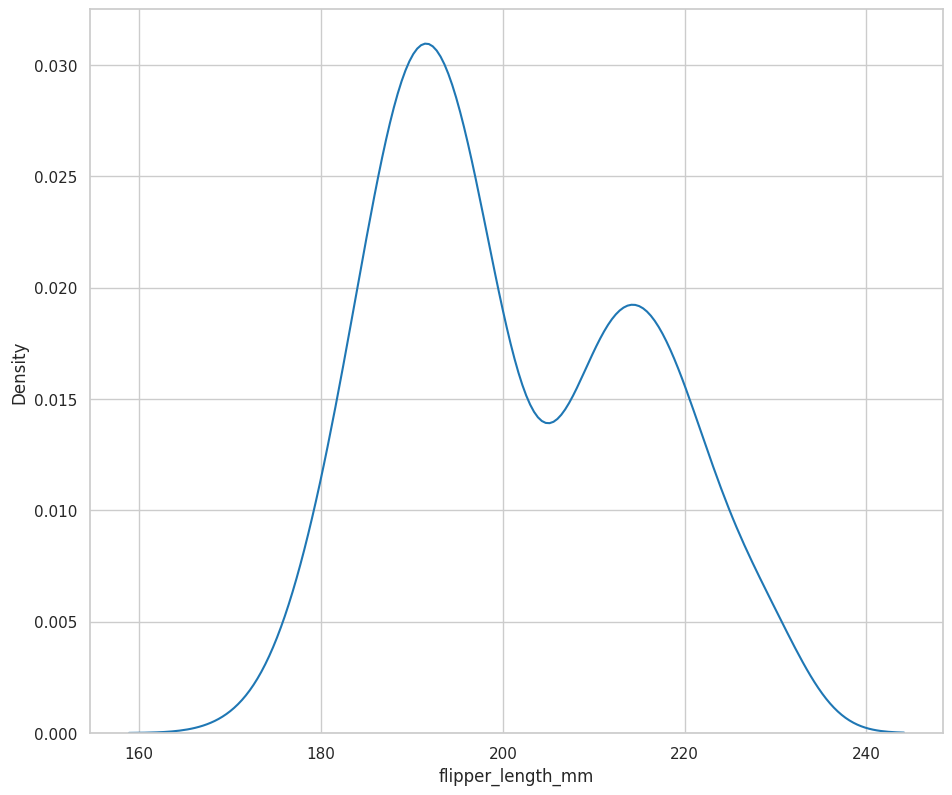

In [42]:
sns.kdeplot(
    data = df,
    x = 'flipper_length_mm'
)

<AxesSubplot: >

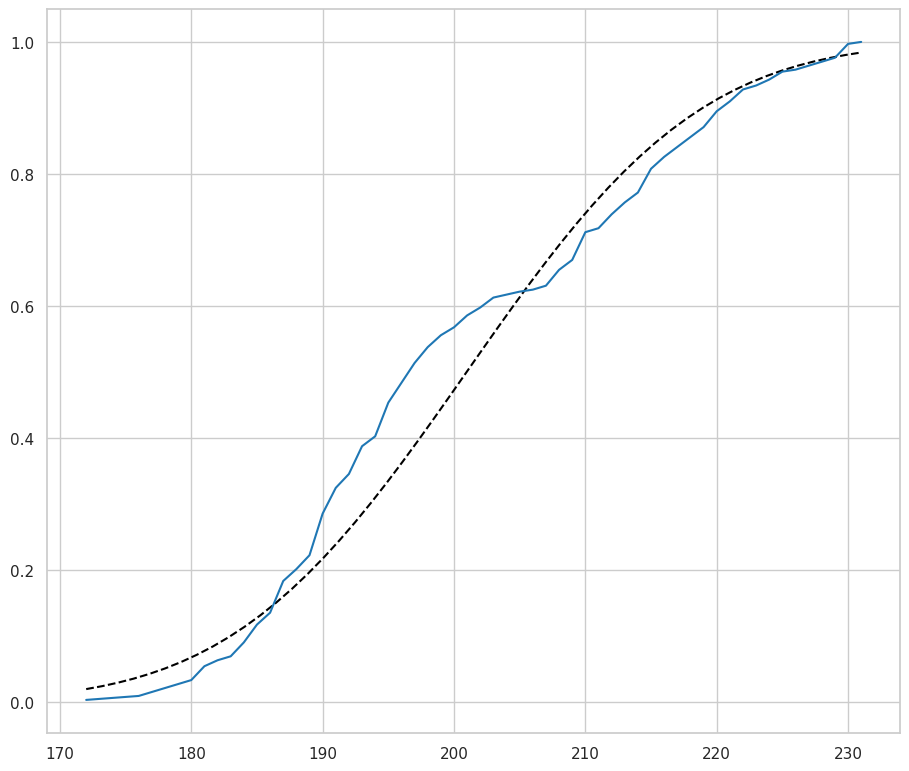

In [165]:
# Obtenemos los estadisticos de la variable
stats = df.flipper_length_mm.describe()

# generamos los valores aleatorios a partir de los estadisticos de los datos 
# utilizando el ECDFs
xs = np.linspace(stats['min'], stats['max']) #array de valores aleatorios
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) #valores de probabilidad para cada valor

# grafica de la distribucion de datos aleatorios
plt.plot(xs, ys, color='black', linestyle='dashed')

# grafica de la distribucion de los datos reales
empiricaldist.Cdf.from_seq(
    df.flipper_length_mm,
    normalize=True
).plot()

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

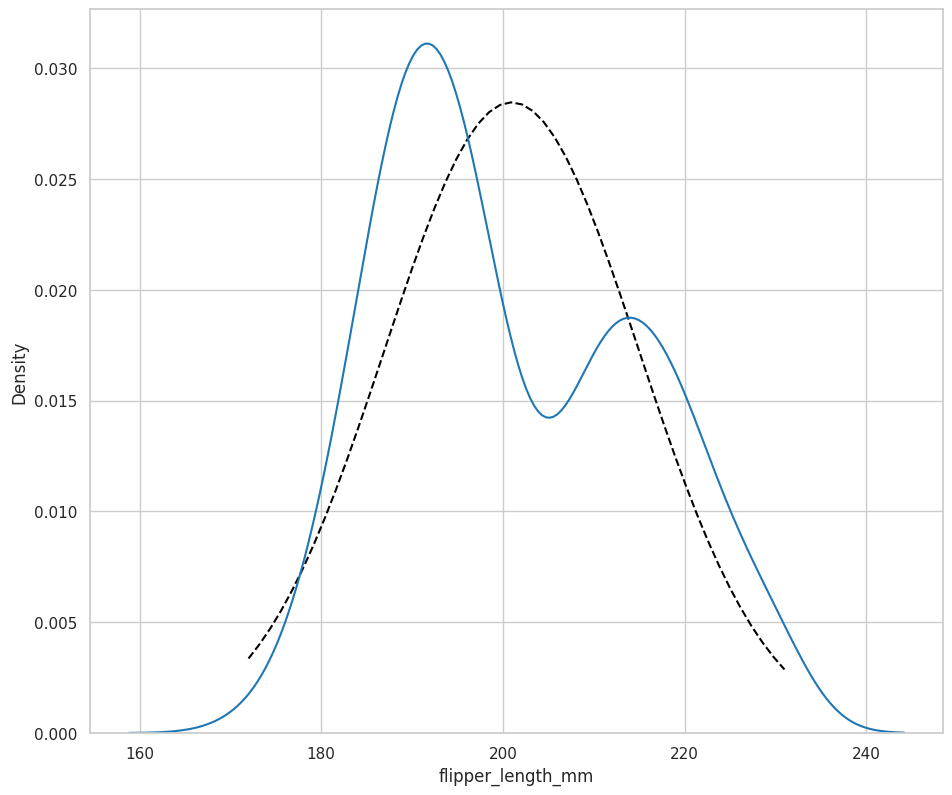

In [167]:
# generar valores aleatorios a partir de los estadisticos de los datos
# utilizando el PDFs
xs = np.linspace(stats['min'], stats['max']) #array de valores aleatorios
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) #valores de probabilidad para cada valor

# grafica de la distribucion de datos aleatorios
plt.plot(xs, ys, color='black', linestyle='dashed')

# empiricaldist no incluye esta funcion por lo que utilizamos seaborn
sns.kdeplot(
    data=df,
    x='flipper_length_mm'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

Demostracion Computacional del T. de los grande numeros
Tomamos como ejemplo el lanzamiento de una dado

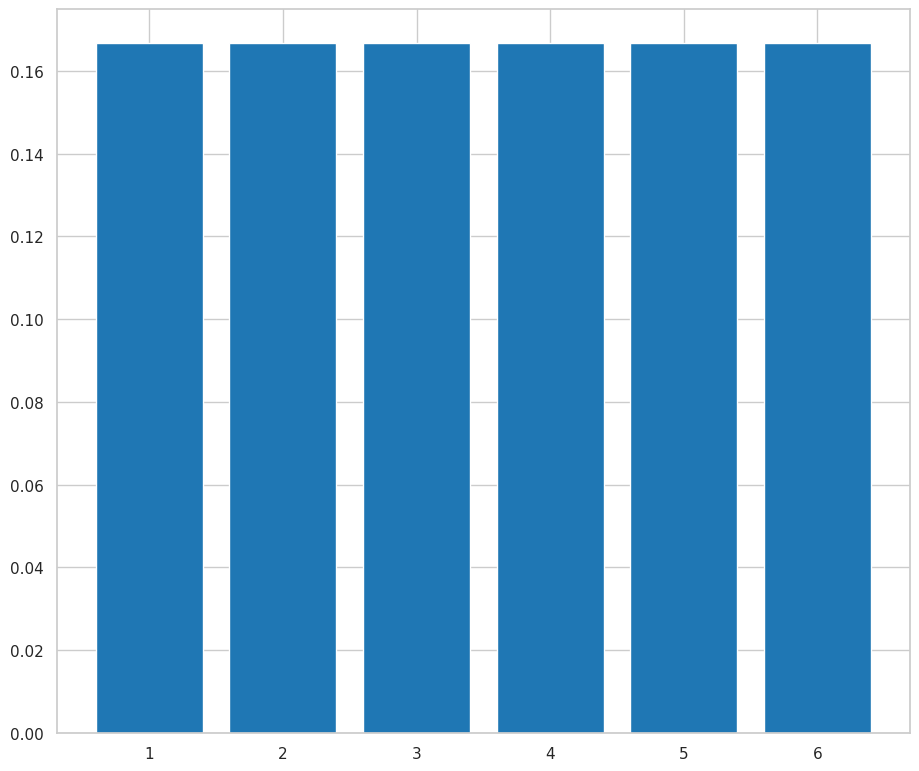

In [169]:
#calculo de la probabilidad para cada cara del dado
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

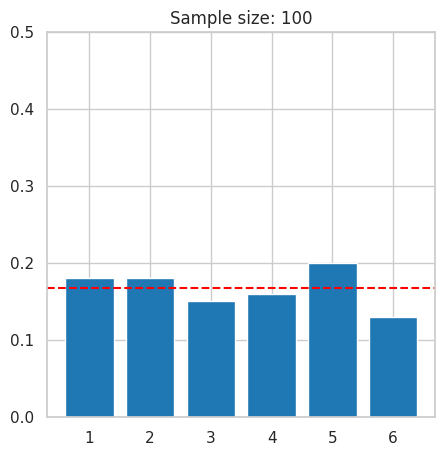

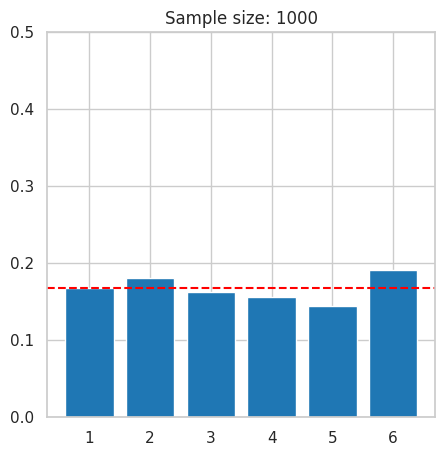

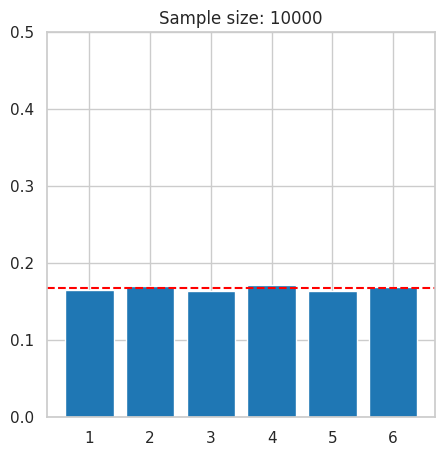

In [170]:
#Valores de probabilidad para cada cara del dado en diferentes tamaños de muestras
#10 a la 2, 10 a la 3, 10 a la 4
for sample_size in (1e2, 1e3,1e4):  #100 1000 10000
    sample_size = int(sample_size)
    values = dice.sample(sample_size) # obtener valores segun tamaño de la muestra
    sample_pmf = empiricaldist.Pmf.from_seq(values) #calculo de la probabilidad para cada valor
	
		#graficas para cada tamaño de muestra
    plt.figure(figsize=(5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='red', linestyle='dashed')
    plt.ylim([0,0.50])
    plt.title(f'Sample size: {sample_size}')

## Teorema del Límite Central

Demostracion del T. del Limite Central
Analizamos una variable binaria

In [59]:
#Porcentaje de aparicion de las distintas opciones dentro de la variable
df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

La variable sex sigue una distribucion binomial. Como es categorica, debemos convertirla en una variable numerica

In [171]:

sex_numeric = df.sex.replace(['male', 'female'], [1,0])

ijamos el numero de muestras a tomar y el tamaño de cada muestra, luego calculamos la media de los machos de cada muestra y a todas ellas le sacamos la media observando asi que se aproxima a la proporcion de machos dada por los datos

In [173]:
number_sample = 1000 #cantidad de muestras a tomar
sample_size = 35 #tamaño de la muestra

sample_df = pd.DataFrame() #dataframe donde se almacena las media de cada muestra

np.random.seed(42)

for i in range(1, number_sample + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f'sample {i}'
    sample_df[sample_name] = sex_numeric_sample

male_population_mean = sample_df.mean().mean()
print(f'El porcentaje de pinguinos machos en la poblacion es de: {male_population_mean*100:.4f}%')

/tmp/ipykernel_18470/987965224.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_18470/987965224.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_18470/987965224.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

El porcentaje de pinguinos machos en la poblacion es de: 50.1829%


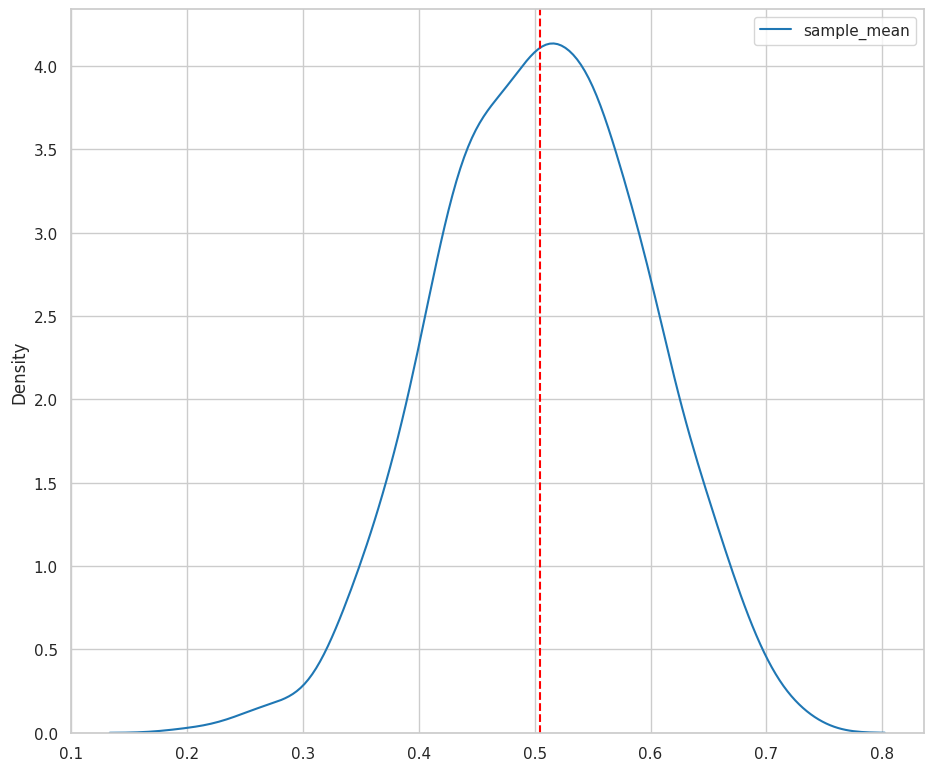

In [63]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

La distribucion binomial se convierte en este caso en una distribucion Normal como se evidencia en la grafica que sigue

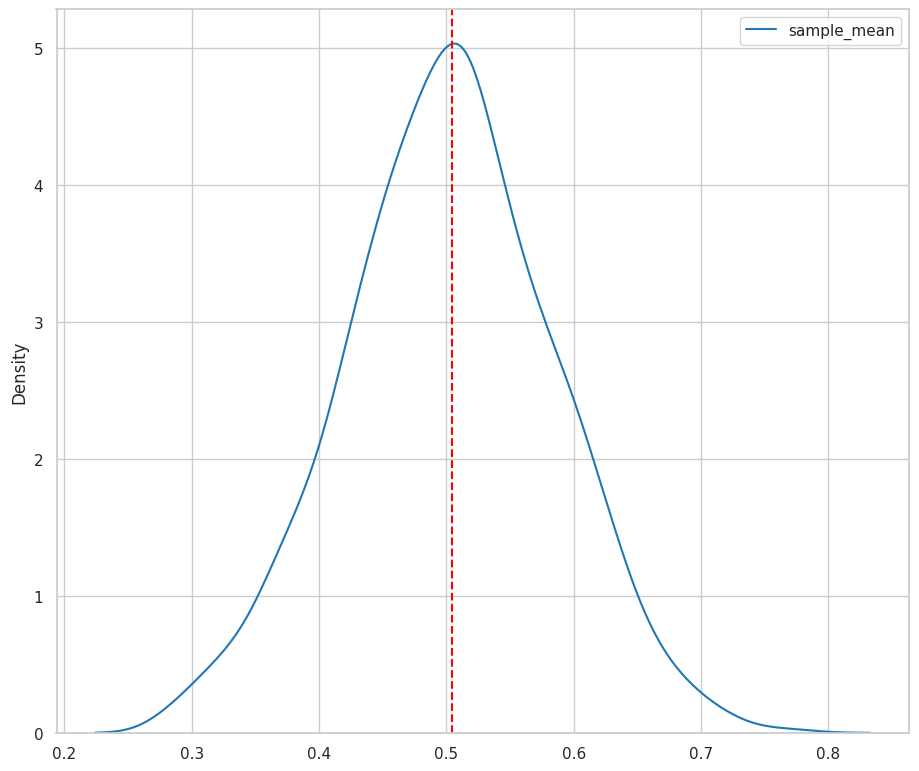

In [174]:
sample_means_binomial = pd.DataFrame(sample_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

# Estableciendo relaciones: Gráfica de puntos

In [69]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

Las relaciones entre dos variables puede analizarse mediante un grafico de puntos o scatterplot. Nos da una idea de la tendencia o agrupamiento de los datos. Algunas sugerencias para construir un scatterplot son:

Cuando hay muchos puntos en la grafica no se perciben de forma correcta. Puedes mejorar la visualizacion modificando la transparencia de los puntos con el parametro alpha. Un alpha de 1/30 implica que se necesitan 30 datos para que el punto sea totalmente del color negro.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

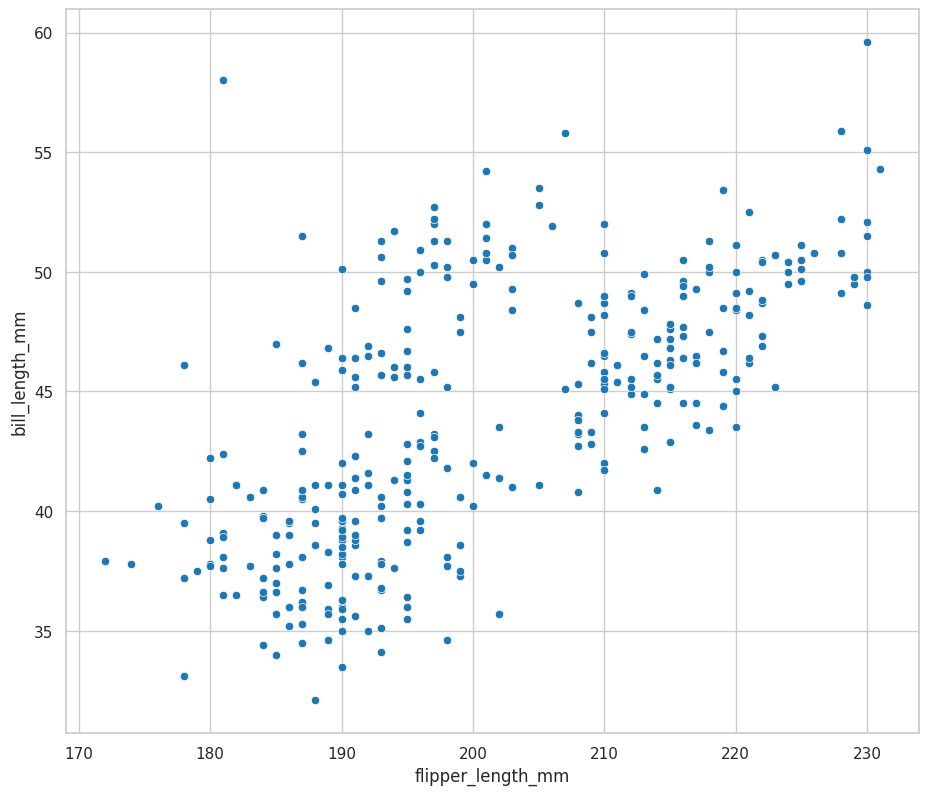

In [70]:
sns.scatterplot(
    data= df,
    x='flipper_length_mm',
    y= 'bill_length_mm'
)

Utilizar histogramas de dos dimensiones. Cuenta los valores que quedan dentro de un intervalo de la variable x y un intervalo de la variable ‘y’ y muestra la frecuencia utilizando una barra de colores.

Cambio de color de los puntos. Ayuda a visualizar las zonas donde se concentra la mayor cantidad de datos

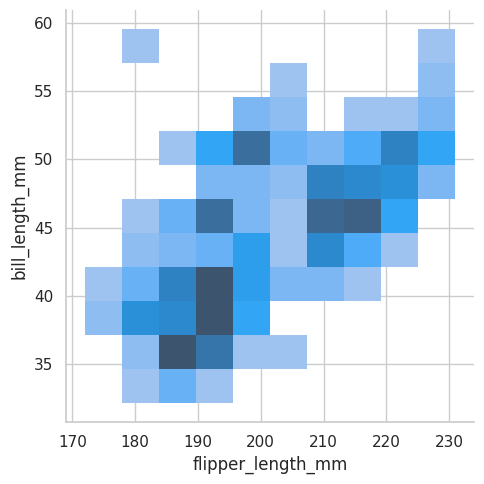

In [175]:
sns.displot(
    data= df,
    x='flipper_length_mm',
    y= 'bill_length_mm',

)

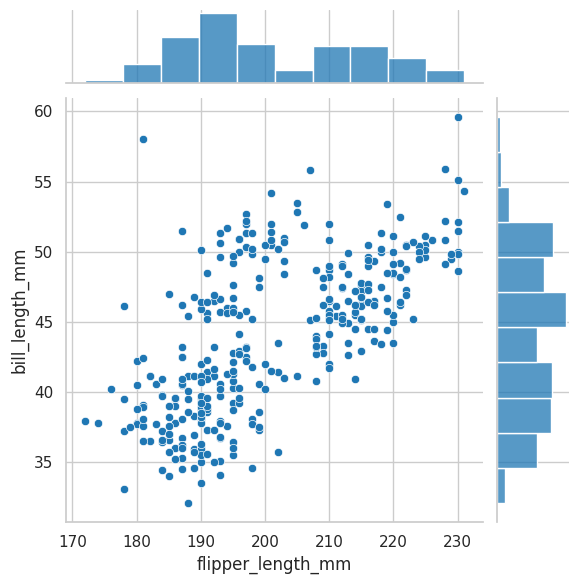

In [75]:
sns.jointplot(
    data= df,
    x='flipper_length_mm',
    y= 'bill_length_mm',
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

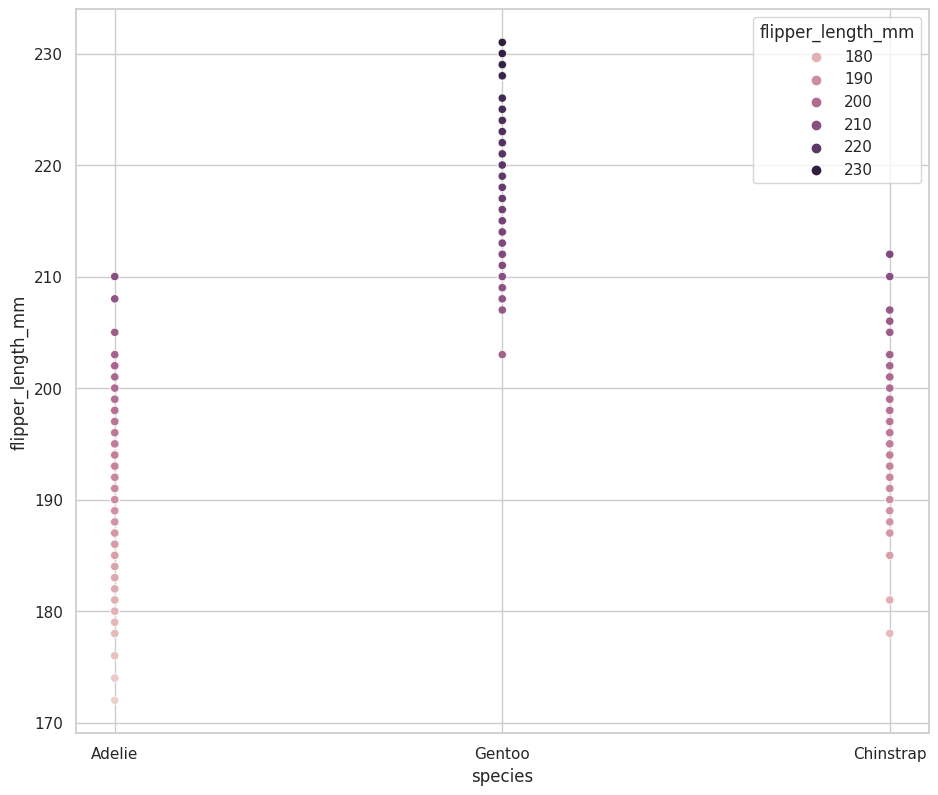

In [76]:
sns.scatterplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    hue='flipper_length_mm', #agrega un calor distinto por categoria
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

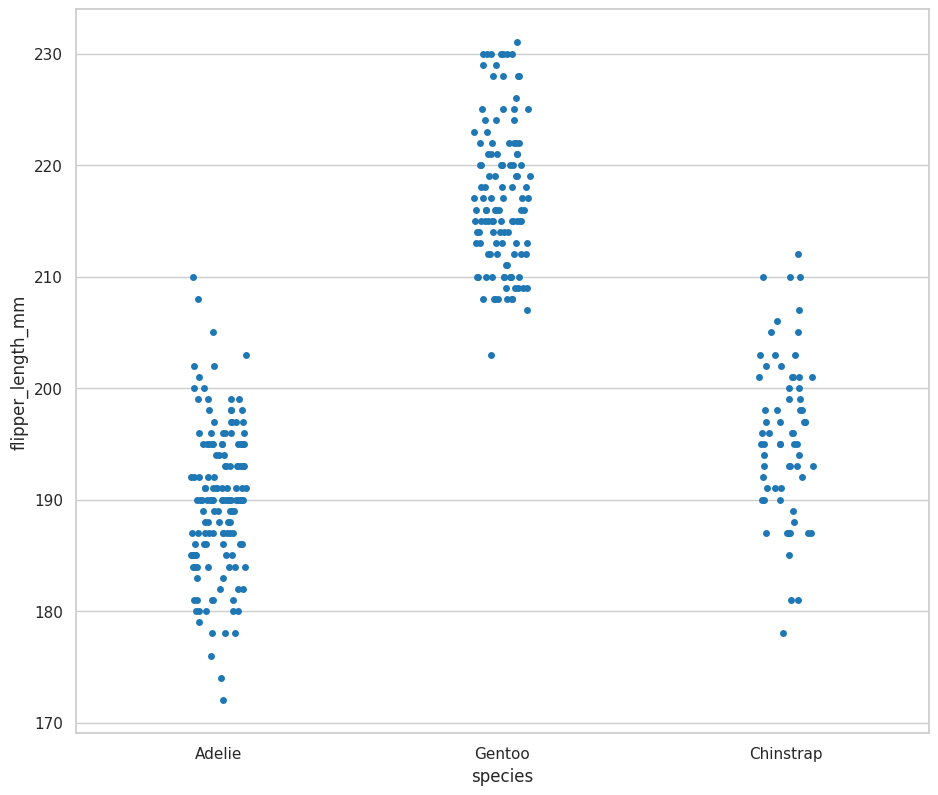

In [79]:
sns.stripplot(
    data=df,
    x='species',
    y='flipper_length_mm',
)

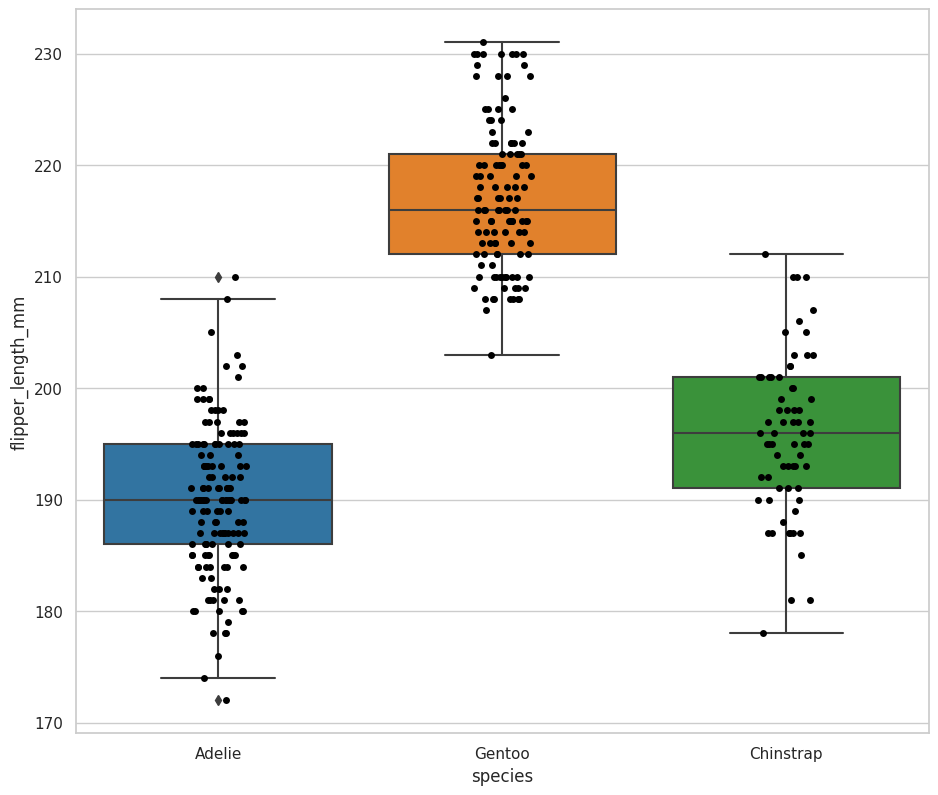

In [80]:
ax = sns.boxplot(
    data=df,
    x='species',
    y='flipper_length_mm',
)

#grafico de puntos
ax = sns.stripplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    color = 'black'    
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

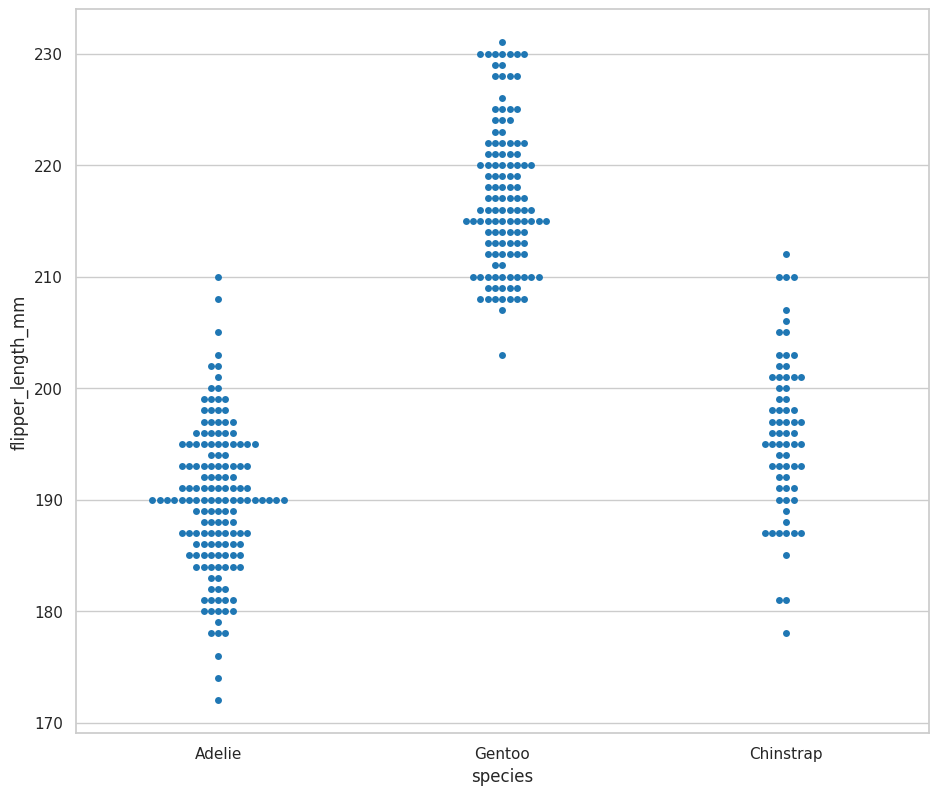

In [86]:
sns.swarmplot(
    data=df,
    x='species',
    y='flipper_length_mm',
)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [87]:
df.corr()

/tmp/ipykernel_6951/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


## ¿Cómo puedo visualizar los coeficientes de correlación?

/tmp/ipykernel_6951/765115317.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr(),


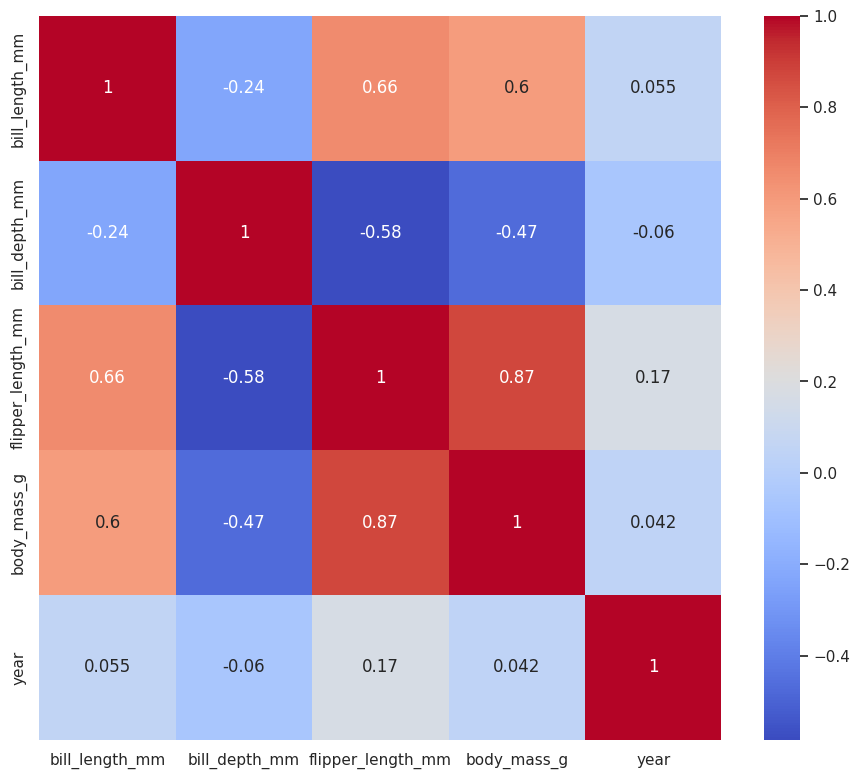

In [95]:
sns.heatmap(
    #Las medidas al hacer la correlacion, son por defecto desde -1 (correlacion negativa ) a 1 (correlacion positiva)
    data = df.corr(), 
    annot= True,
    cmap='coolwarm');

Clustermap organiza el orden de las variables dentro del mapa de calor para que queden en orden creciente en relacion a la diagonal

/tmp/ipykernel_6951/3467349355.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr(),


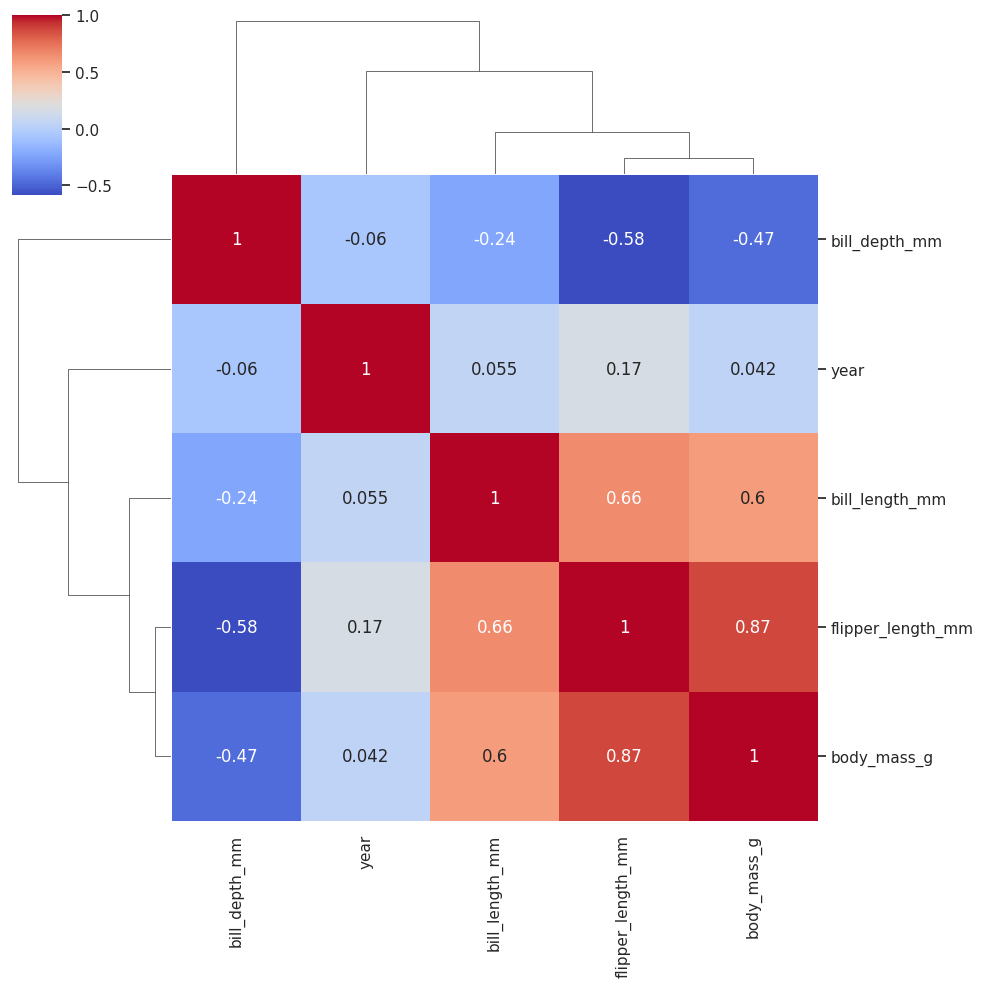

In [96]:
sns.clustermap(
    data = df.corr(), 
    annot= True,
    cmap='coolwarm');

## ¿Cómo podría representar una variable categórica como númerica discreta?

En este caso se aplica un numero en relacion a cada tipo de variable (1 pinguion gordo, 0 para pinguino delgado), se puede hacer con loc, iloc, etc..

In [4]:
media_peso = df.body_mass_g.mean()

Esta funcion recive la masa del pinguino, si es mayor a la media se devuelve un 1, de lo contrario un 0

In [6]:
def bin(value):
    if value > media_peso:
        return 1
    else:
        return 0

In [7]:
#Los valores de la funcion se almacenan dentro de una nueva columna
df['gordura'] = df['body_mass_g'].apply(bin)

/tmp/ipykernel_18470/1232603494.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr(),


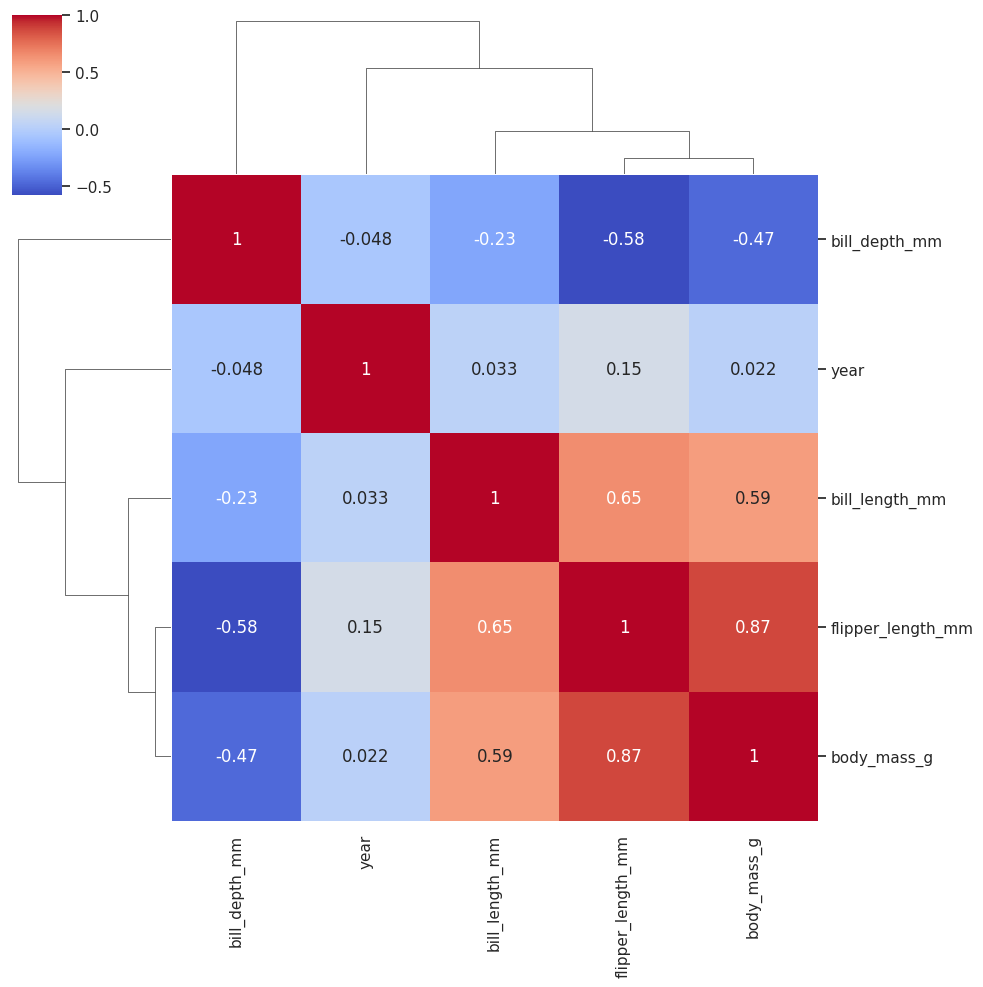

In [176]:

sns.clustermap(
    data = df.corr(), 
    annot= True,
    cmap='coolwarm');

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

<AxesSubplot: >

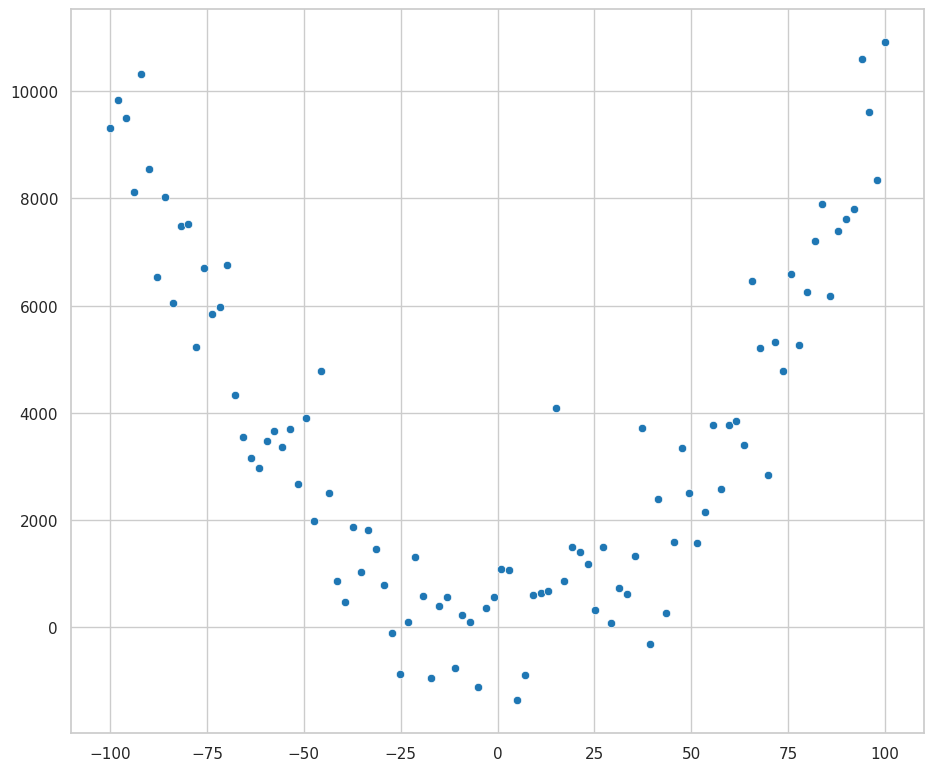

In [101]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0,1000, x.size)

sns.scatterplot(
    x = x, y = y
)

Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausencia no significa que no exista otro tipo de correlación.

Cuando la distribucion tiene un comportamiento cuadratico el coeficiente no logra detectar esa correlacion.
Cuando la distribucion tiene un comportamiento cubico, el coeficiente detecta la correlacion simulando que es una linea recta donde se compensa los valores por lo que hace una lectura erronea del panorama
Siempre visualiza los datos.
El coeficiente de correlacion no nos habla del impacto de la relacion. Un coeficiente de correlacion mas alto que otro no significa que la relacion entre las variables sea mejor o que el aporte al negocio de la correlacion mas alta sea mejor

array([[1.        , 0.91668347],
       [0.91668347, 1.        ]])

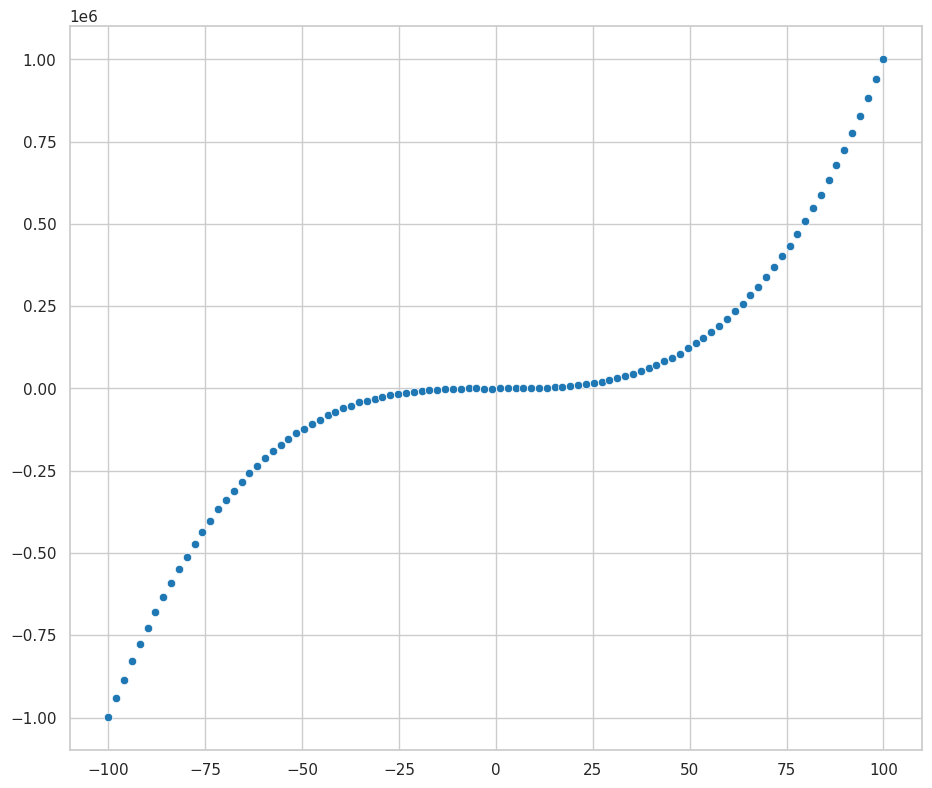

In [105]:
x = np.linspace(-100, 100, 100)
y = x**3 + np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x = x,
    y = y
)
np.corrcoef(x, y)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


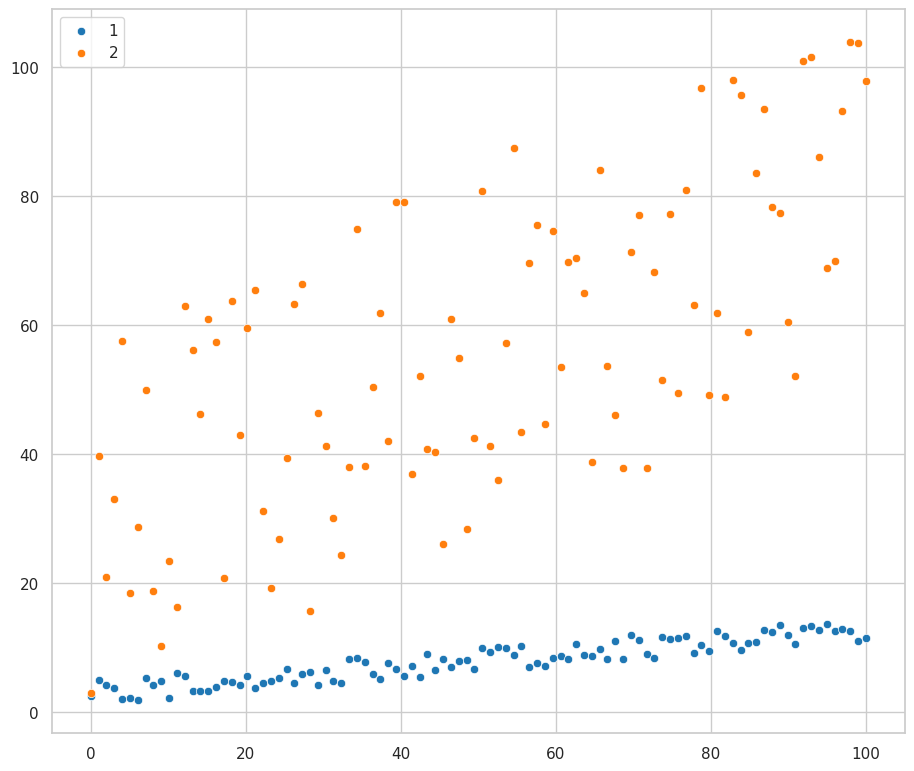

In [106]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

Como el coeficiente de correlacion aveces puede ser distinto al impacto que puede tener el cambio de una variable sobre otra, se utiliza la regresion lineal.

Forma manual de calcular y mostrar la regresion lineal

In [177]:
x = df.flipper_length_mm
y = df.body_mass_g

res_1 = scipy.stats.linregress(x = x, y=y)


print(res_1, sep = '\n')

LinregressResult(slope=50.15326594224116, intercept=-5872.092682842832, rvalue=0.8729788985653618, pvalue=3.1328362509699484e-105, stderr=1.540230983824632, intercept_stderr=310.28515535134926)


In [ ]:
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = r1.intercept + r1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = r2.intercept + r2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

In [ ]:
sns.scatterplot(preprocessed, x="bill_length_mm", y="bill_depth_mm")

res_penguins = scipy.stats.linregress(x=preprocessed.bill_length_mm, y=preprocessed.bill_depth_mm)

print(res_penguins)

fx1 = np.array([preprocessed.bill_length_mm.min(), preprocessed.bill_length_mm.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1

plt.plot(fx1,fy1) 

In [ ]:
Forma prefabricada de seaborn para mostrar la linea de regresion lineal dentro del grafico

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

# Limitaciones del análisis de regresión simple

Limitacion del Analisis de Regresion Simple
La regresion lineal simple de A - B no es lo mismo que B - A. Las regresiones pueden ser diferentes en cada caso. Debes elegir de correctamente cual sera la variable independiente y dependiente.
Si dos variables crecen o decrecen siguiendo las mismas pautas, no implica necesariamente que una cause la otra. Correlacion no implica causalidad.
Solo puede manejar relaciones lineales. Es importante visualizar los datos para poder determinar que tipo de regression utilizar.
Visualizacion de la Asimetria de la Regresion Lineal

## La regresión lineal simple no es simétrica

In [178]:
x = df.bill_depth_mm
y = df.bill_length_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

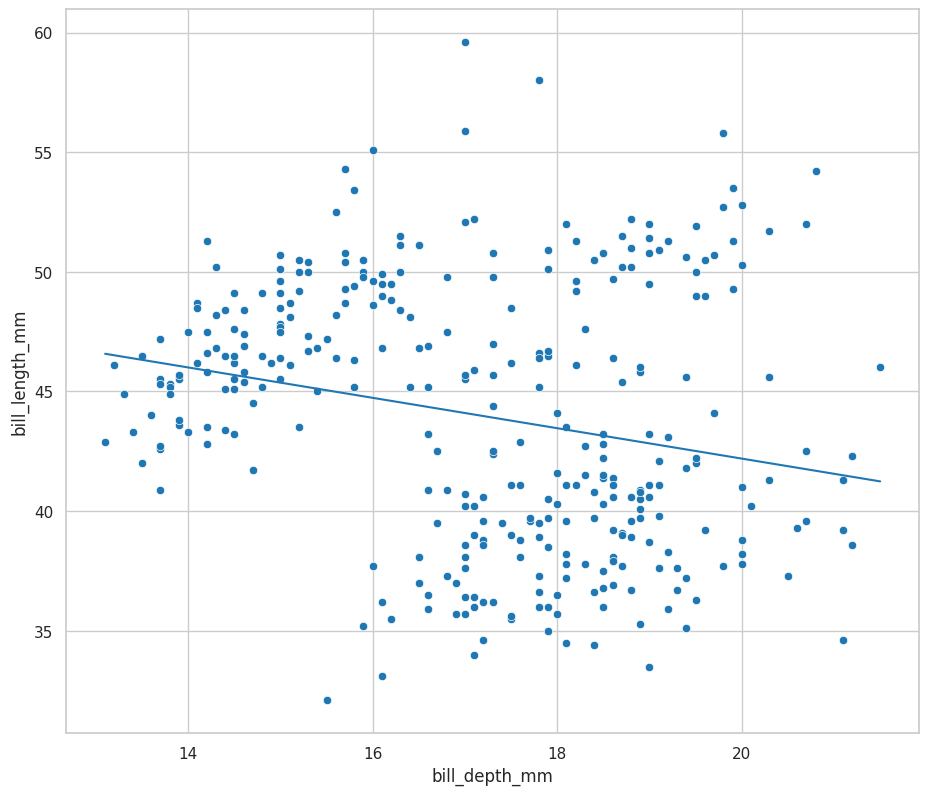

In [180]:
#Fig. 1
sns.scatterplot(
    x=x,
    y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);

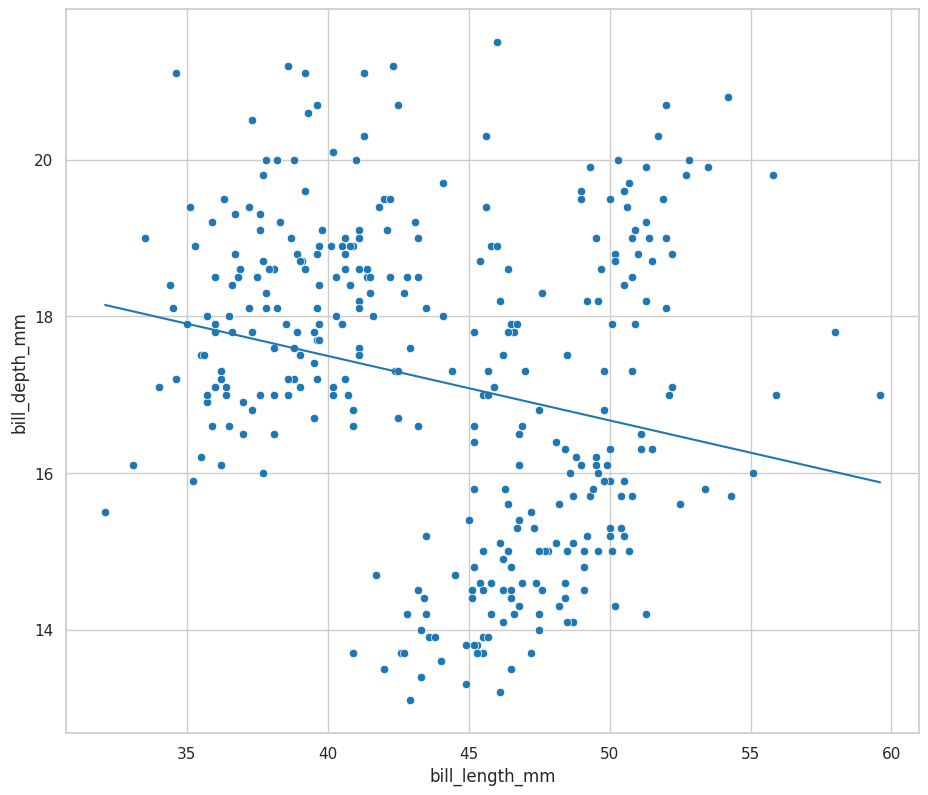

In [181]:
#Fig. 2
#Regrecion lineal de y en relacion con x
sns.scatterplot(
    x=y,
    y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

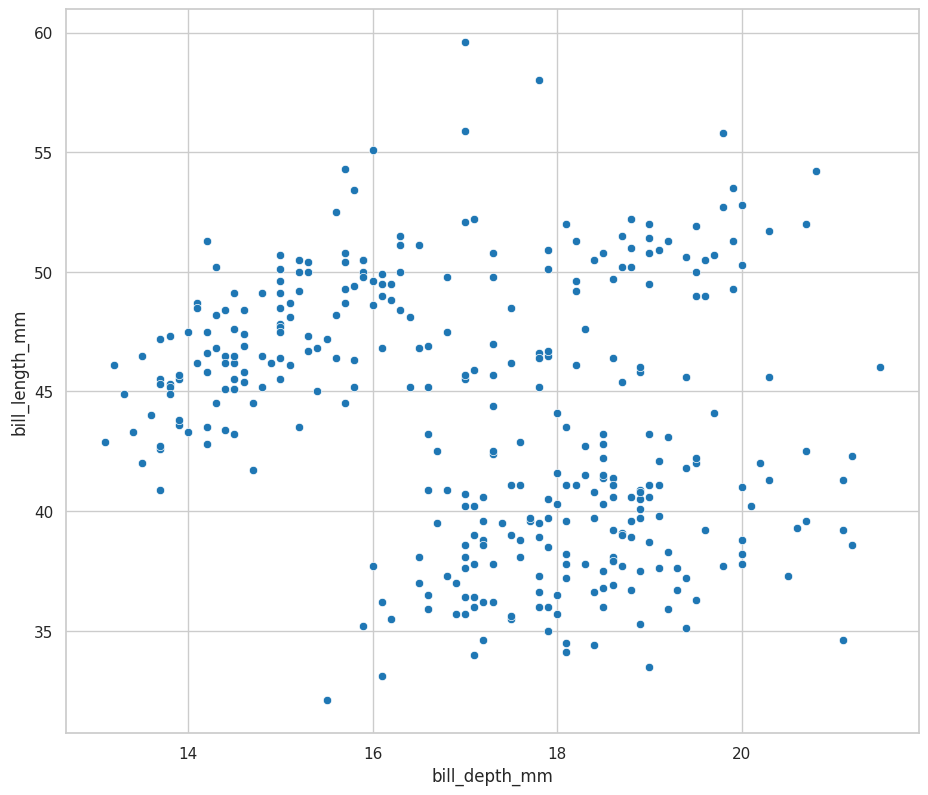

In [116]:
# Fig. 3
sns.scatterplot(
    x=x,
    y=y
)
#X n¡en relacion con y
plt.plot(fx_1, fy_1)
#Y en relacion con x
plt.plot(fy_2, fx_2)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

Separar las relaciones entre las variables con la libreria scipy



In [184]:
(#De esta manera se obtiene por separado cuando la linea intercepta el eje x
 #La relacion de decrecimiento/crecimiento de y respecto a x
    smf.ols(
        #El primer parametro pertenece a las y, el segundo a las x
        formula='bill_length_mm ~ bill_depth_mm ',
        data=df
    )
    .fit()
    .params
)

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [185]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

En el parametro "fromula" se espesifica la primer variable como la dependiente y la segunda como la independiente.

De la variable independiente bill_length vemos que la pendiente es de 86.79 lo que indica que por cada cambio en milimetro de longitud del pico se genera un cambio de 86 gramos en el peso.

In [186]:
model_1 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm',
        data=df
    )
    .fit()
)

model_1.summary()  #descripcion del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Thu, 11 May 2023   Prob (F-statistic):           1.54e-32
Time:                        23:40:38   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 2

In [187]:
model_2 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm',
        data=df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 11 May 2023   Prob (F-statistic):           7.04e-46
Time:                        23:40:57   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Modelo 3

In [188]:
model_3 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data= df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Thu, 11 May 2023   Prob (F-statistic):          9.26e-103
Time:                        23:41:03   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 4

Cuando se coloca una variable categorica, como en este caso el sexo del pinguino, lo que mostrara es la diferencia de la especie mayormente afectada.

Debemos tener en cuenta el R cuadrado de cada modelo ya que es un indicador de la variabilidad obtenida por las variables contrastadas. A mayor R cuadrado, se captura mejor el comportamiento de las variables. En el primer modelo es muy bajo (0.34). En el tercer modelo es de 0.76 lo que indica que captura mejor la variabilidad de los datos

In [189]:
model_4 = (
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data = df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Thu, 11 May 2023   Prob (F-statistic):          6.28e-122
Time:                        23:41:14   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Modelo 5

In [190]:
model_5 = (
    smf.ols(
        formula='body_mass_g ~ flipper_length_mm + C(sex)',
        data= df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Thu, 11 May 2023   Prob (F-statistic):          3.53e-118
Time:                        23:41:22   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La R cuadrado es cada vez mayor lo que indica que este ultimo modelo captura mucho mejor el comportamiento de las variables. El valor de la pendiente para la variable sexo indica que los macho pesan 541 gr mas que las hembras

Modelo 5: Un modelo mientras mas sencillo mejor. Se debe contrastar aquellas variables que esten mas relacionadas con la variable objetivo; Esto ayuda a disminuir el error de los modelos y mejorar su efectividad de prediccion. Peso del pinguino vs longitud de las alas, sexo

### Visualizando resultados

#### Creación de tabla de resultados

Para tener una comparacion optima del comportamiento de cada modelo con el comportamiento de los datos, primero creamos una tabla de comparacion con la prediccion de cada modelo y los datos reales.

In [206]:
models_result = pd.DataFrame
#Se almacena el resultado de la prediccion de cada modelo como clave valor y se almacena en formato diccionario para ser transformado a dataframe
(dict(
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
    )
)

{'prediction_model_1': array([3782.40296098, 3817.11966484, 3886.55307256, 3574.10273783,
        3799.76131291, 3765.04460905, 3791.08213694, 3955.98648027,
        3739.00708116, 3391.84004257, 3565.42356186, 3747.68625712,
        4077.49494378, 3374.48169064, 4381.26610255, 3669.57367344,
        3660.89449747, 3504.66933011, 3704.2903773 , 3756.36543309,
        3452.59427432, 3912.59060045, 3903.91142449, 3678.2528494 ,
        3903.91142449, 3817.11966484, 3617.49861765, 3817.11966484,
        3938.62812835, 3548.06520993, 3791.08213694, 3756.36543309,
        4051.45741589, 3652.21532151, 3843.15719273, 3556.7443859 ,
        3929.94895238, 3513.34850607, 4216.36175922, 3600.14026572,
        3825.7988408 , 3955.98648027, 3513.34850607, 4060.13659185,
        3825.7988408 , 3869.19472063, 3426.55674642, 4034.09906396,
        3383.1608666 , 3982.02400817, 3773.72378501, 3912.59060045,
        3556.7443859 , 3652.21532151, 3487.31097818, 3973.3448322 ,
        3652.21532151, 395

La distribucion que se muestra en values_result esta un poco sesgada. Ahora ubicamos el modelo que mas concuerda con la distribución de value_result. A simple vista notamos que la distribucion que mas se asemeja es la del modelo 5



#### ECDFs

Grafica de los resultados de la tabla mediante la Funcion de Distribucion Acumulada (ECDFs)

Pudimos haber encontrado las mismas conclusiones del modelo 5 si en el Analisis Exporatorio hubieramos experimentado con un grafico entre la longitud de las aletas y el peso de los pinguinos utilizando el sexo como variable categorica. El analisis exploratorio de los datos es sumamente importante ya que nos ayuda a intuir el modelo desde el inicio y de esa manera a ahorrar tiempo.

#### PDFs

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

Dentro de las opciones y posibilidades esta la de hacer un joinplot y ver la relacion de las variables por separado y la de explorar manualmente

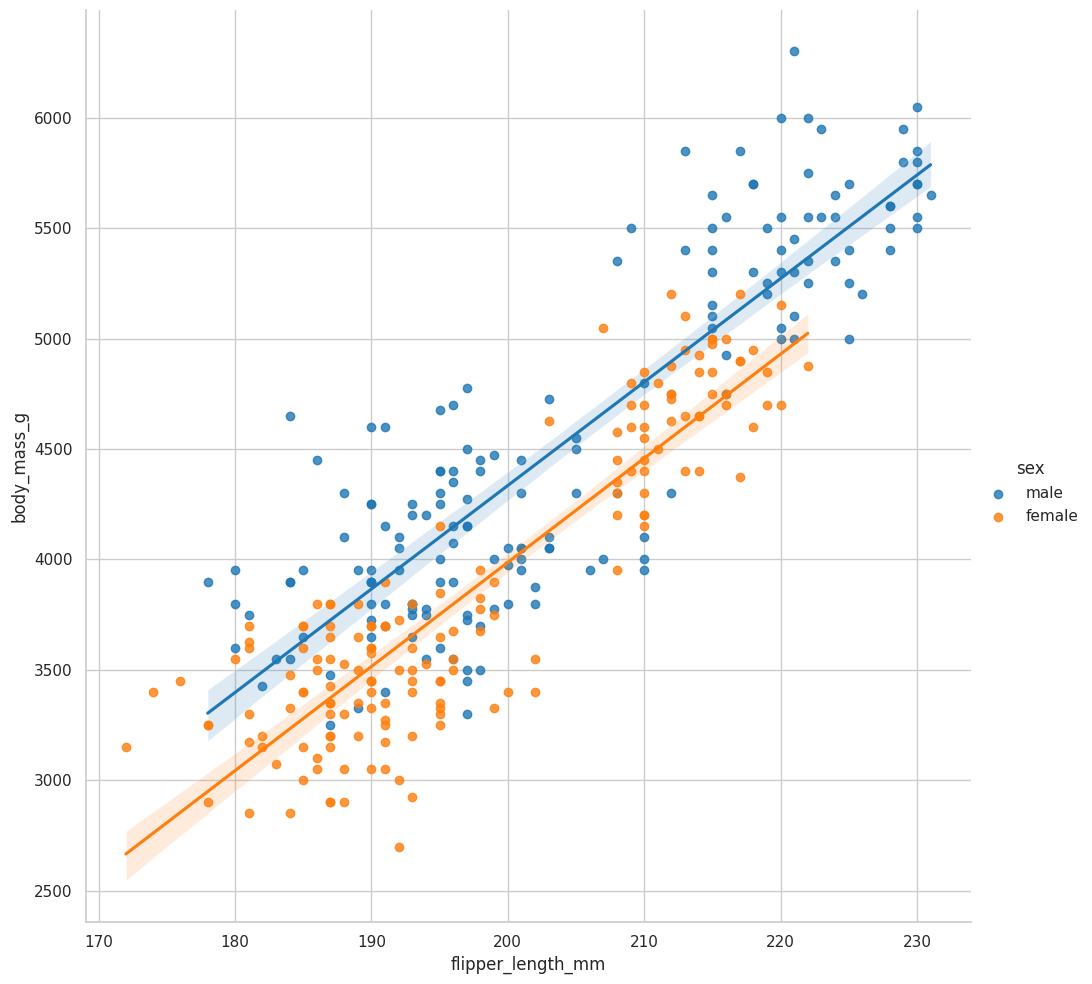

In [208]:
sns.lmplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

Creamos el modelo con las variables que consideremos influyen en la eleccion de si es un macho o hembra. Nuestra variable objetivo es categorica (sexo), por tanto, debemos convertirla en numerica para poder aplicar al modelo.

In [27]:
def sex_n(value):
    if value == 'male':
        return 1
    else:
        return 0

In [28]:
df['sex_n'] = df.sex.apply(sex_n)

El modelo logistico muestra las probabilidades de ocurrencia de las variables categoricas en comparacion con una de todas las disponibles sobre la misma columna, en este caso compara las probabilidad de que un pinguino sea macho en dos de las islas en relacion con la tercera que  no figura en la tabla resultante.

El parametro P > abs(Z) indica cuales son las variables mas significativas estadisticamente para el resultado. Mientras mas tienda al valor 0 mas significativa es.

In [31]:
#Modelo logistico de la variable sexo numerica VS longitud de las aletas, ancho del pico, largo del pico, y la isla
smf.logit(
    formula='sex_n ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data= df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366325
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  sex_n   No. Observations:                  342
Model:                          Logit   Df Residuals:                      336
Method:                           MLE   Df Model:                            5
Date:                Wed, 10 May 2023   Pseudo R-squ.:                  0.4714
Time:                        14:41:44   Log-Likelihood:                -125.28
converged:                       True   LL-Null:                       -237.00
Covariance Type:            nonrobust   LLR p-value:                 2.721e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -59.9812      6.694     -8.960      0.000     -73.101     -46.861
C(island)[T.Dream]        -1.4940      0.486     -3.072      0.002      -2.447      -0.541
C(island)[T.Torgersen]    -1.1906      0.587     -2.028      0.043      -2.341      -0.040
flipper_length_mm          0.1350      0.023      5.837      0.000       0.090       0.180
bill_length_mm             0.1409      0.044      3.196      0.001       0.054       0.227
bill_depth_mm              1.6023      0.178      8.996      0.000       1.253       1.951
==========================================================================================
"""

## Exploración de nuestras variables categóricas

In [57]:
#Se visualiza la relacion del sexo del pinguino por isla
df_sexo_isla = pd.DataFrame(df.groupby(df.island).count().copy())

In [58]:
print(df_sexo_isla)

           species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
island                                                                 
Biscoe         168             167            167                167   
Dream          124             124            124                124   
Torgersen       52              51             51                 51   

           body_mass_g  sex  year  sex_n  
island                                    
Biscoe             167  163   168    168  
Dream              124  123   124    124  
Torgersen           51   47    52     52  


Se decarta la utilizacion de la columna de la isla para la prediccion del sexo, ya que estas esta relacionada con la diferencia de cantidad de pinguinos entre una y otra.

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

In [213]:
def is_adelie(value):
    if value == 'Adelie':
        return 1
    else:
        return 0

In [214]:
df['especie_n'] = df.species.apply(is_adelie)

Creamos el modelo logistico con las variables que consideramos relevantes para determinar la especie de un pinguino.

In [215]:
#Modelo para determinar si un pinguino es adelie segun su sexo y el largo de las aletas
model_is_adele = smf.logit(
    formula='especie_n ~ flipper_length_mm + C(sex)',
    data=df
).fit()

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Obtenemos los parametros del modelo resultante

In [63]:
model_is_adele.params #muestra solo los parametros del modelo

Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [216]:
is_adelie_df_prediction = pd.DataFrame(
    dict(
        actual_adelie = df.especie_n,
        predicted_values = model_is_adele.predict().round()  #round indica solo si es cero o uno
    )
)